# Выбор семейства распределений в наивном байесе
В этом задании вы сможете немного расслабиться после реализации случайного леса и градиентного бустинга по мотивам материалов прошлой недели. Все, что нужно будет делать — запускать методы из sklearn. Вам предлагается выяснить, какое распределение лучше использовать в наивном байесовском классификаторе в зависимости от вида признаков.

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки. С помощью sklearn.cross_validation.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько полученные результаты согласуются с рекомендациями из лекций?

Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы можете продолжить исследование на других выборках (например, из UCI репозитория).

Для сдачи задания, ответьте на приведенные ниже вопросы.

In [2]:
from sklearn import datasets, model_selection, naive_bayes
import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
cancer_dataset = datasets.load_breast_cancer()
digits_dataset = datasets.load_digits()

In [6]:
print(cancer_dataset['DESCR'])

cancer_X = cancer_dataset['data']
cancer_y = cancer_dataset['target']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(digits_dataset['DESCR'])

digits_X = digits_dataset['data']
digits_y = digits_dataset['target']

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Вопрос 1
Каким получилось максимальное качество классификации на датасете breast_cancer?

In [10]:
clfs = {
    'bernoulli': naive_bayes.BernoulliNB(),
    'multinomial': naive_bayes.MultinomialNB(),
    'gaussian': naive_bayes.GaussianNB()
}

In [11]:
def write_answer_nb1(best_cancer_score):
    with open("naive_bayes_answer1.txt", "w") as fout:
        fout.write(str(best_cancer_score))

In [15]:
cancer_scores = {}

for clf_type in clfs:
    cancer_scores[clf_type] = model_selection.cross_val_score(clfs[clf_type], cancer_X, cancer_y).mean()

print(cancer_scores)
write_answer_nb1(max(cancer_scores.values()))

{'bernoulli': 0.6274181027790716, 'multinomial': 0.8963204471355379, 'gaussian': 0.9385188635305075}


#### Вопрос 2
Каким получилось максимальное качество классификации на датасете digits?

In [16]:
def write_answer_nb2(best_digits_score):
    with open("naive_bayes_answer2.txt", "w") as fout:
        fout.write(str(best_digits_score))

In [18]:
digits_scores = {}

for clf_type in clfs:
    digits_scores[clf_type] = model_selection.cross_val_score(clfs[clf_type], digits_X, digits_y).mean()

print(digits_scores)
write_answer_nb2(max(digits_scores.values()))

{'bernoulli': 0.8241736304549674, 'multinomial': 0.8703497369235531, 'gaussian': 0.8069281956050759}


#### Вопрос 3
Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

  1. ~~На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли~~
  2. ~~На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением~~
  3. Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
  4. На вещественных признаках лучше всего сработало нормальное распределение

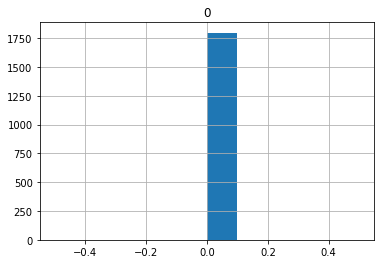

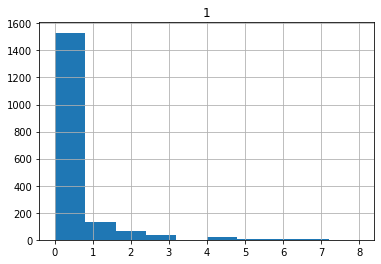

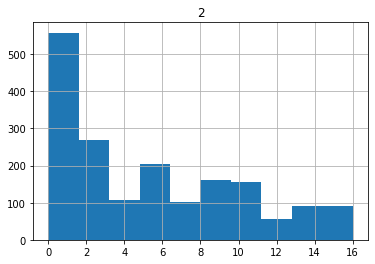

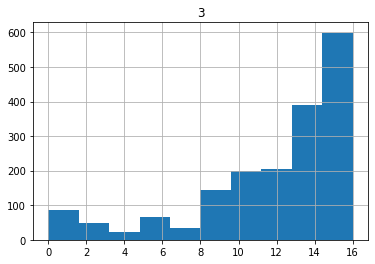

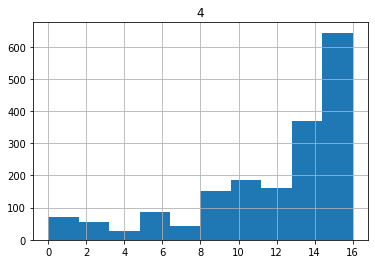

In [23]:
for col in pd.DataFrame(digits_X).columns[:5]:
    pd.DataFrame(digits_X)[[col]].hist()

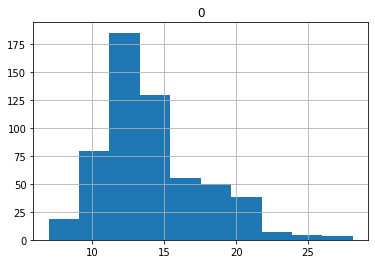

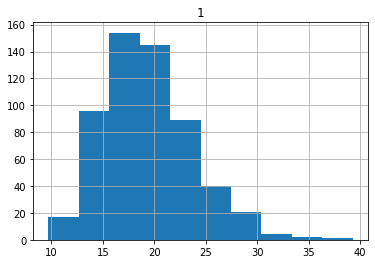

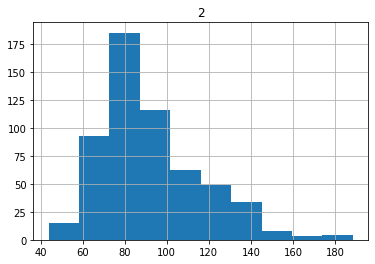

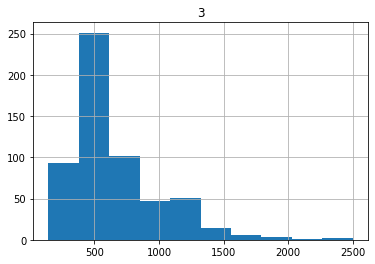

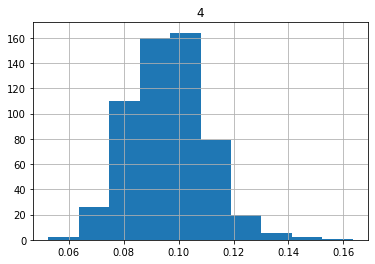

In [24]:
for col in pd.DataFrame(cancer_X).columns[:5]:
    pd.DataFrame(cancer_X)[[col]].hist()

In [25]:
def write_answer_nb3(right_numbers):
    with open("naive_bayes_answer3.txt", "w") as fout:
        fout.write(str(right_numbers))

In [27]:
answer = "3 4";
write_answer_nb3(answer)